In [26]:
import pandas as pd

DATA_PATH = "../data/"

df_pol = pd.read_csv(DATA_PATH + "israel_political_violence.csv")
df_civ = pd.read_csv(DATA_PATH + "israel_civilian_targeting.csv")
df_demo = pd.read_csv(DATA_PATH + "israel_demonstration.csv")
df_gdp = pd.read_csv(DATA_PATH + "israel_gdp_per_capita.csv")
df_gdp.head()
df_gdp.columns

df_pol.head(), df_civ.head(), df_demo.head()


(  Country     Month  Year  Events  Fatalities
 0  Israel   January  2016       5           3
 1  Israel  February  2016       4           1
 2  Israel     March  2016       6           3
 3  Israel     April  2016       4           1
 4  Israel       May  2016       8           0,
   Country     Month  Year  Events  Fatalities
 0  Israel   January  2016       1           2
 1  Israel  February  2016       2           0
 2  Israel     March  2016       3           3
 3  Israel     April  2016       3           1
 4  Israel       May  2016       5           0,
   Country     Month  Year  Events  Unnamed: 4
 0  Israel   January  2016      11         NaN
 1  Israel  February  2016      18         NaN
 2  Israel     March  2016      10         NaN
 3  Israel     April  2016       8         NaN
 4  Israel       May  2016       8         NaN)

In [23]:
def add_date_column(df):
    df["date_str"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)
    df["date"] = pd.to_datetime(df["date_str"], format="%Y-%B")
    return df.sort_values("date")

df_pol = add_date_column(df_pol)
df_civ = add_date_column(df_civ)
df_demo = add_date_column(df_demo)

df_pol.head()


,Country,Month,Year,Events,Fatalities,date_str,date
0,Israel,January,2016,5,3,2016-January,2016-01-01
1,Israel,February,2016,4,1,2016-February,2016-02-01
2,Israel,March,2016,6,3,2016-March,2016-03-01
3,Israel,April,2016,4,1,2016-April,2016-04-01
4,Israel,May,2016,8,0,2016-May,2016-05-01


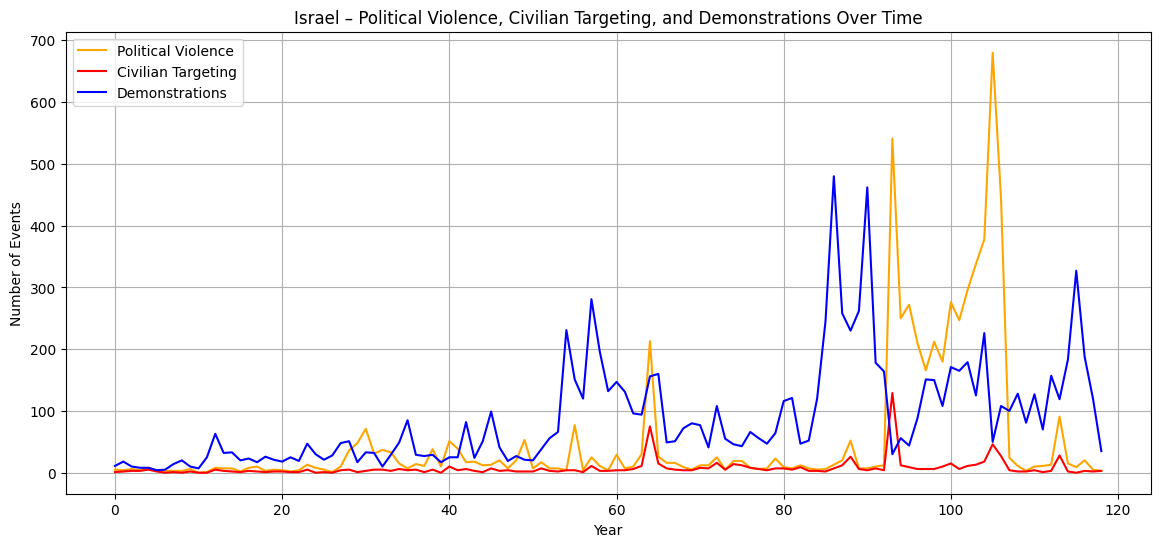

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(df_pol.index,  df_pol["Events"], label="Political Violence",   color="orange")
plt.plot(df_civ.index,  df_civ["Events"], label="Civilian Targeting",  color="red")
plt.plot(df_demo.index, df_demo["Events"], label="Demonstrations",     color="blue")

plt.title("Israel – Political Violence, Civilian Targeting, and Demonstrations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.legend()
plt.show()




## Fatalities Over Time (Israel, ACLED data)

The extreme spike in October 2023 corresponds to the Hamas attack on Israel on 7 October 2023, causing over a thousand fatalities in a single day—a dramatic outlier compared to all other months in the dataset.

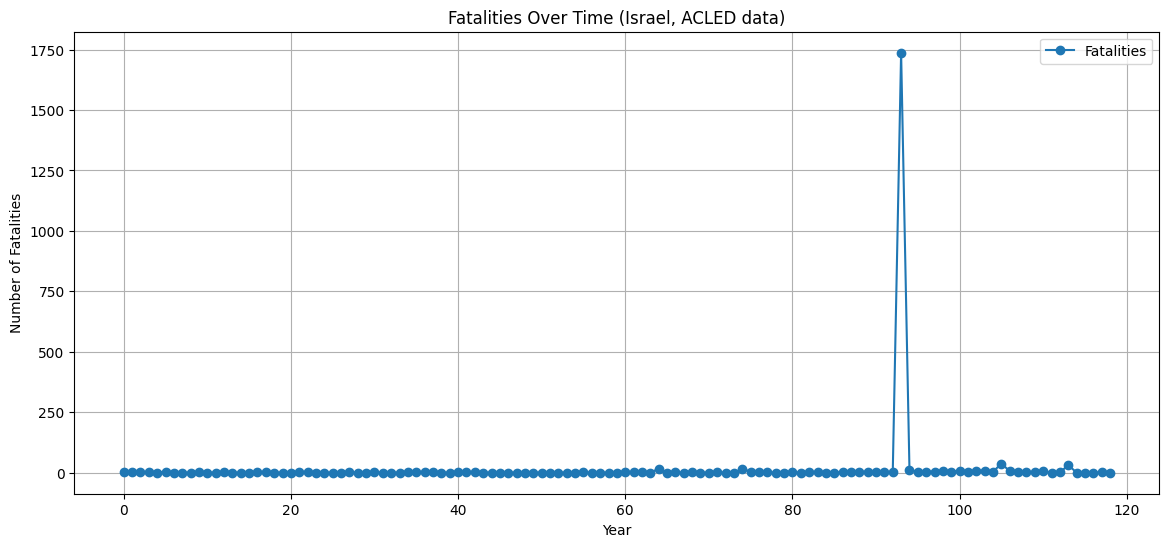

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_pol.index, df_pol["Fatalities"], marker="o", label="Fatalities")

plt.title("Fatalities Over Time (Israel, ACLED data)")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.grid(True)
plt.legend()
plt.show()



## Political Violence Events Over Time (Israel, ACLED)

It reports political violence events happening inside Israel, mainly involving Palestinian groups, Israeli security forces, cross-border attacks, and political demonstrations.



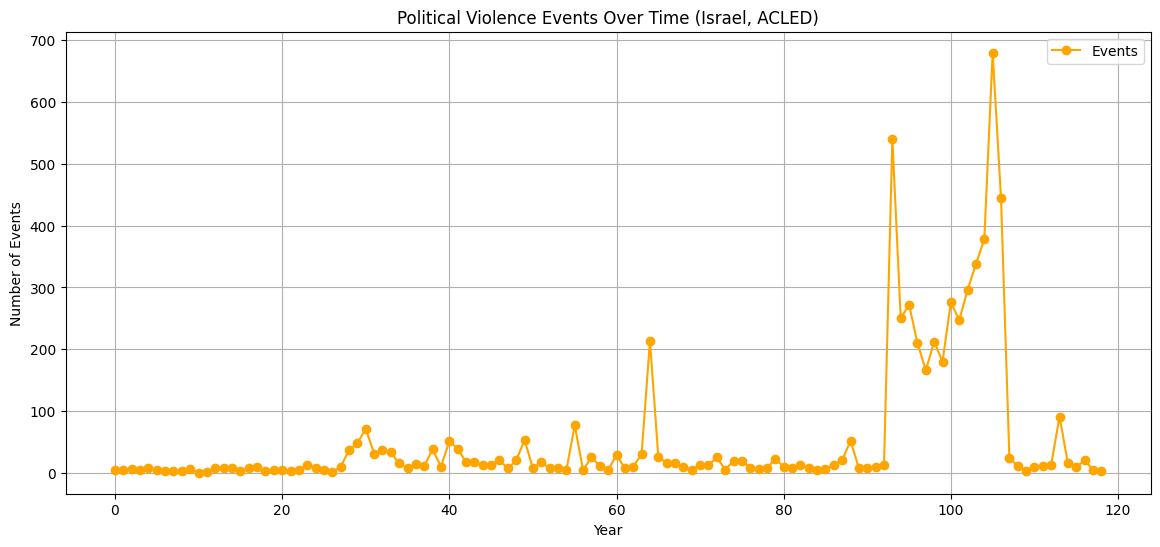

In [33]:
plt.figure(figsize=(14,6))
plt.plot(df_pol.index, df_pol['Events'], marker='o', color="orange", label="Events")
plt.title("Political Violence Events Over Time (Israel, ACLED)")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.legend()
plt.show()



### 🟠 Spike - Early 2021

- You’ll see a large jump roughly in the middle of 2021.
- This corresponds to a period of heightened violence inside Israel: a mix of major cross-border incidents, rocket fire, and internal clashes.
- For example, in May 2021, there was the conflict in Gaza which overlapped with Israeli territory incidents (the so-called “11-day war”).
- So this spike reflects a temporary escalation of political-violence events for a short time, then it drops back down.

### 🟠 Spike - 2023-2024 surge
- The highest spike in your graph is around “2023-24”.
- This is the major escalation from the October 7, 2023 attack by Hamas and its aftermath, which triggered many events inside Israel territory: cross-border attacks, retaliations, security operations, demonstrations and more.
- That surge pushed the events count far above typical levels — hence the big peak.


### Civilian Targeting Events Over Time (Israel, ACLED)
Shows months when civilians in Israel were directly targeted.

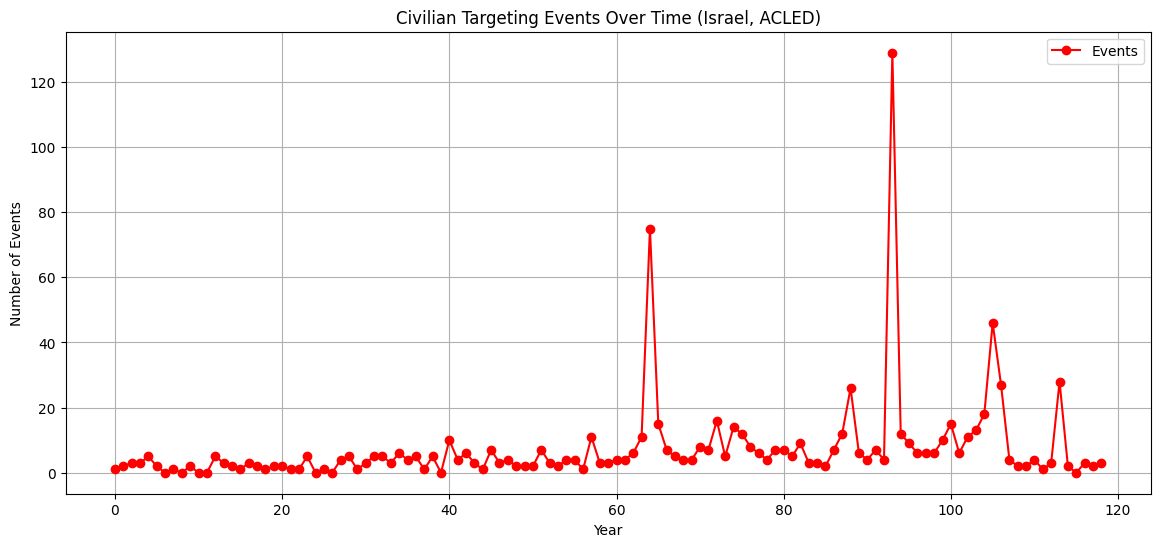

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_civ.index, df_civ["Events"], marker="o", color="red", label="Events")

plt.title("Civilian Targeting Events Over Time (Israel, ACLED)")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.legend()
plt.show()


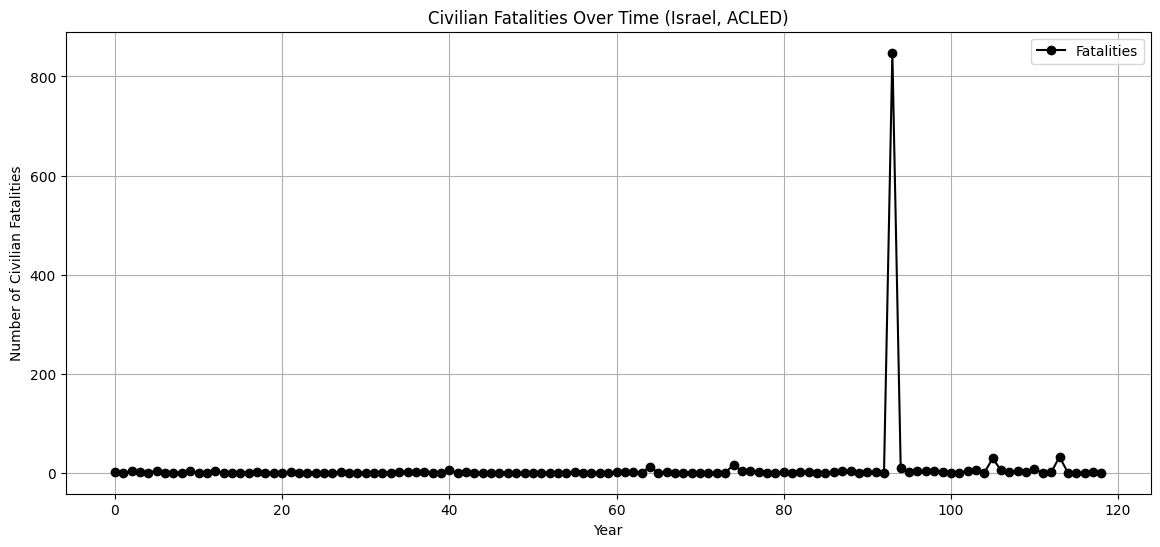

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_civ.index, df_civ["Fatalities"], marker="o", color="black", label="Fatalities")
plt.title("Civilian Fatalities Over Time (Israel, ACLED)")
plt.xlabel("Year")
plt.ylabel("Number of Civilian Fatalities")
plt.grid(True)
plt.legend()
plt.show()


In [48]:
df_civ.nlargest(5, "Fatalities")[["Events", "Fatalities"]]


,Events,Fatalities
93,129,848
113,28,32
105,46,29
74,14,16
64,75,12


In [51]:
df_civ.nlargest(5, "Events")[["Events", "Fatalities"]]


,Events,Fatalities
93,129,848
64,75,12
105,46,29
113,28,32
106,27,5


### 6-Month Rolling Average – Civilian Targeting Events

This line shows the average number of civilian-targeting events over the last 6 months. It smooths out the month-to-month spikes so the long-term trend becomes clearer — whether civilian-directed violence is increasing, decreasing, or staying stable.

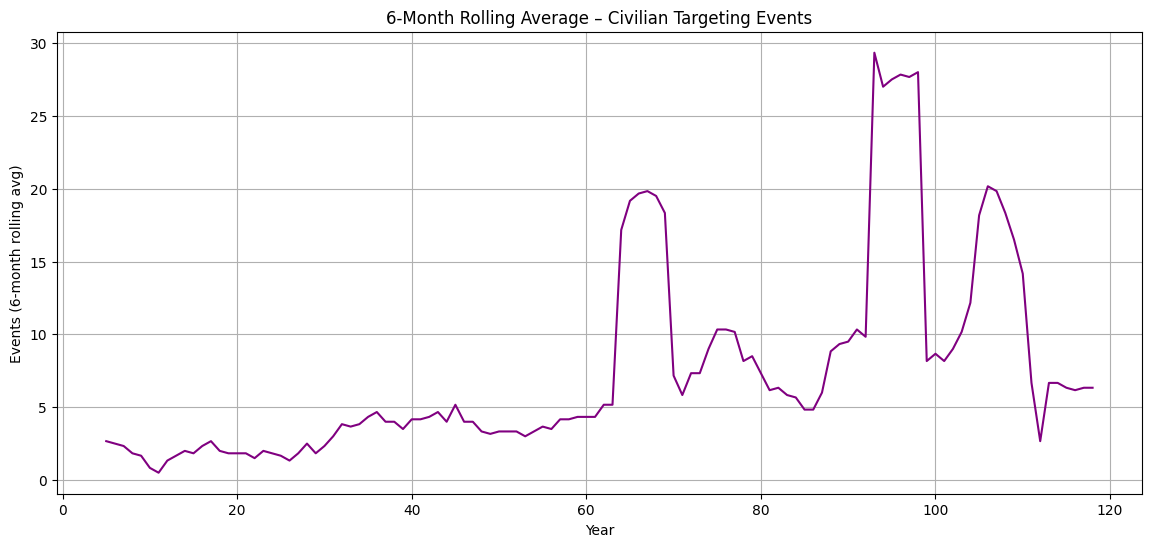

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_civ.index, df_civ["events_rolling"], color="purple")
plt.title("6-Month Rolling Average – Civilian Targeting Events")
plt.xlabel("Year")
plt.ylabel("Events (6-month rolling avg)")
plt.grid(True)
plt.show()



### Demonstration Events Over Time (Israel, ACLED)

Shows monthly demonstration activity inside Israel. Spikes reflect periods of large protest waves or widespread public unrest, while low levels indicate calmer months with little organized mobilization.

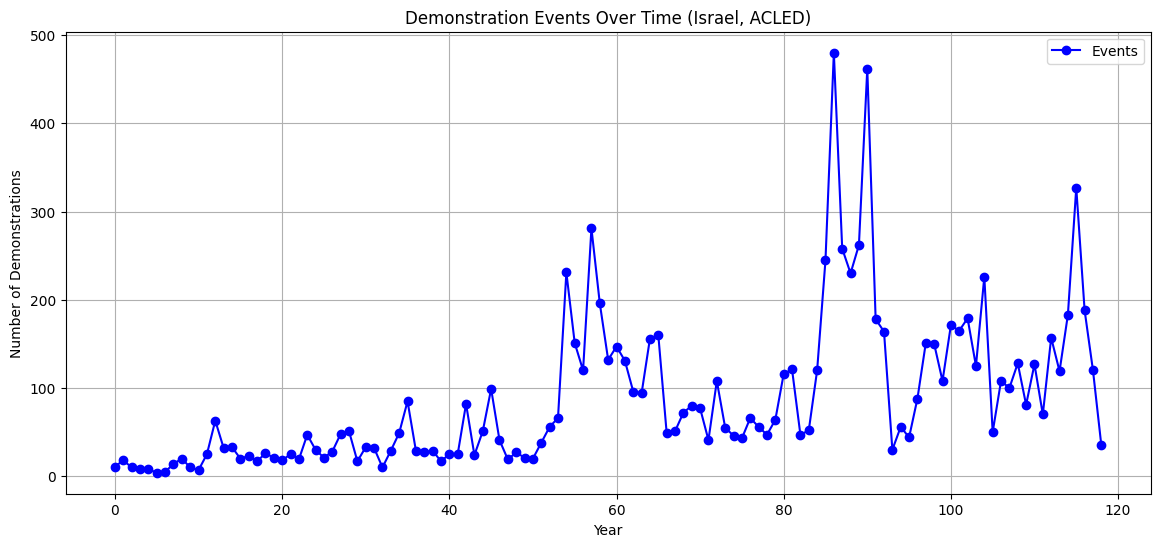

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_demo.index, df_demo["Events"], marker="o", color="blue", label="Events")

plt.title("Demonstration Events Over Time (Israel, ACLED)")
plt.xlabel("Year")
plt.ylabel("Number of Demonstrations")
plt.grid(True)
plt.legend()
plt.show()


## Conclusion (Israel, ACLED – inside Israel only):

Between 2016–2025, political violence, civilian targeting, and demonstrations inside Israel shift from a relatively quiet pre-2018 phase to a higher-tension regime with frequent protests and more regular violent incidents. Civilian harm is usually low but spikes sharply during major escalations such as May 2021 and especially October 2023, when the Hamas attack creates an extreme outlier in both political violence and civilian fatalities. Demonstration and political-violence trends are moderately correlated with lags in both directions, suggesting a tension cycle where protests and violence influence each other rather than a simple one-way causality. Within the wider Israel–Palestine conflict, these patterns show how underlying political and security tensions are continuously present inside Israel and occasionally erupt into large-scale, high-impact violence.

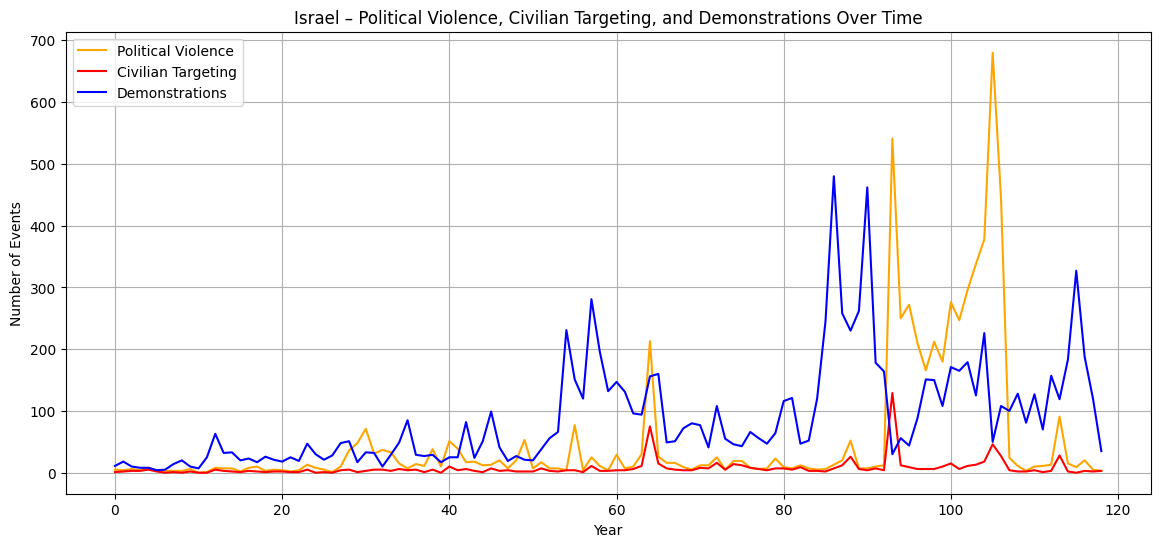

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(df_pol.index,  df_pol["Events"],  label="Political Violence",  color="orange")
plt.plot(df_civ.index,  df_civ["Events"],  label="Civilian Targeting", color="red")
plt.plot(df_demo.index, df_demo["Events"], label="Demonstrations",     color="blue")

plt.title("Israel – Political Violence, Civilian Targeting, and Demonstrations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.legend()
plt.show()


### Israel – Real GDP per Capita (Constant 2010 USD)

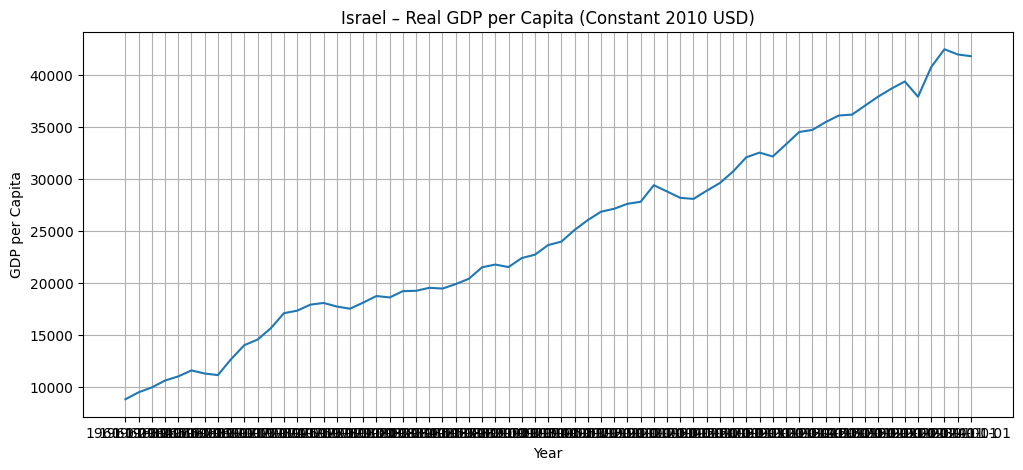

In [59]:
plt.figure(figsize=(12,5))
plt.plot(df_gdp['observation_date'], df_gdp['NYGDPPCAPKDISR'])
plt.title("Israel – Real GDP per Capita (Constant 2010 USD)")
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.grid(True)
plt.show()


In [66]:
df_wb_daily = pd.read_csv("../data/west_bank_daily.csv")
df_wb_daily.head()


,report_date,verified.killed,verified.killed_cum,verified.injured,verified.injured_cum,verified.killed_children,verified.killed_children_cum,verified.injured_children,verified.injured_children_cum,killed_cum,killed_children_cum,injured_cum,injured_children_cum,settler_attacks_cum,flash_source
0,2023-10-07,6.0,6.0,197.0,197.0,2.0,2.0,31.0,31.0,3,0,23,1,3,un
1,2023-10-08,8.0,14.0,127.0,324.0,3.0,5.0,7.0,38.0,13,1,194,1,9,un
2,2023-10-09,4.0,18.0,88.0,412.0,0.0,5.0,19.0,57.0,15,3,295,34,19,un
3,2023-10-10,5.0,23.0,72.0,484.0,0.0,5.0,7.0,64.0,19,3,332,39,29,un
4,2023-10-11,6.0,29.0,85.0,569.0,2.0,7.0,17.0,81.0,26,3,427,62,39,un


In [95]:
df_wb = df_wb_daily.copy()
df_wb.columns = [c.strip().replace(" ", "_") for c in df_wb.columns]

kill_col = kill_cols[0]

df_wb["verified_killed"] = df_wb[kill_col]
df_wb["report_date"] = pd.to_datetime(df_wb["report_date"])
df_wb = df_wb.set_index("report_date")

df_wb_monthly = df_wb["verified_killed"].resample("ME").sum().to_frame()
df_wb_monthly.head()



,verified_killed
report_date,
2023-10-31,125.0
2023-11-30,117.0
2023-12-31,68.0
2024-01-31,61.0
2024-02-29,32.0


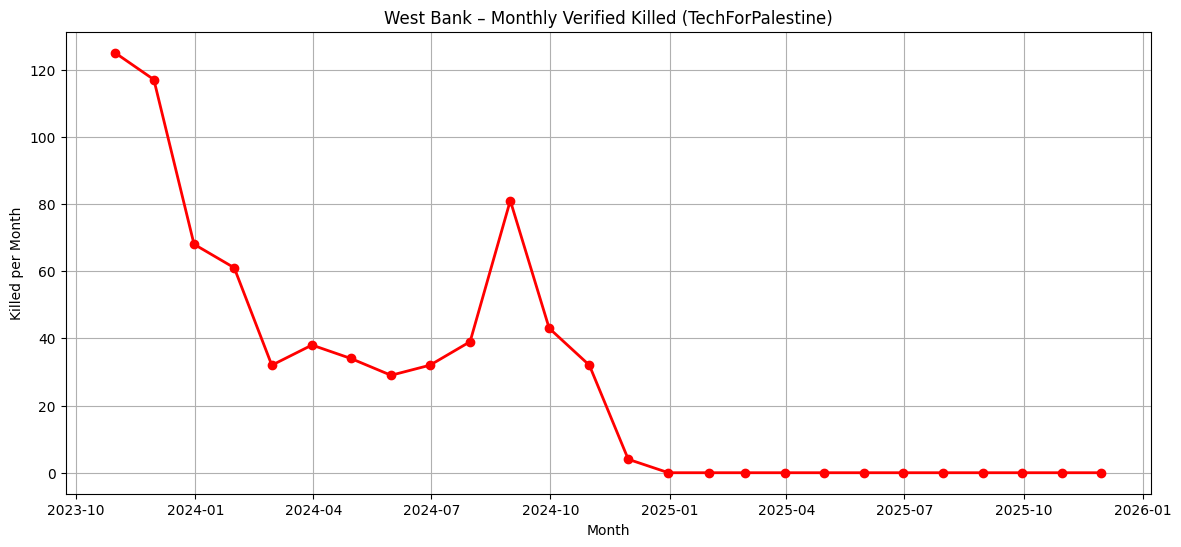

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(
    df_wb_monthly.index,
    df_wb_monthly["verified_killed"],
    marker="o",
    color="red",
    linewidth=2,
)
plt.title("West Bank – Monthly Verified Killed (TechForPalestine)")
plt.xlabel("Month")
plt.ylabel("Killed per Month")
plt.grid(True)
plt.show()


In [84]:
df_gaza_daily = pd.read_csv("../data/casualties_daily_gaza.csv")
df_gaza_daily.head()

,report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,...,press_killed_cum,ext_press_killed_cum,killed_recovered,killed_succumbed,killed_truce_new,killed_committee,child_famine_cum,famine_cum,aid_seeker_killed_cum,aid_seeker_injured_cum
0,2023-10-07,mohtel,24,0,232.0,232.0,232,232,0,0,...,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-08,mohtel,24,0,138.0,370.0,138,370,78,41,...,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-09,mohtel,24,8,190.0,560.0,190,560,91,61,...,3.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-10,mohtel,24,8,340.0,900.0,340,900,260,230,...,7.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-11,gmotel,24,23,200.0,1100.0,200,1100,398,230,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_gaza = df_gaza_daily.copy()
df_gaza = df_gaza.rename(columns=lambda c: c.replace(".", "_"))


In [86]:
df_gaza["report_date"] = pd.to_datetime(df_gaza["report_date"])
df_gaza = df_gaza.set_index("report_date")


In [87]:
DATA_PATH = "../data/"   # or adjust to your structure

df_gaza_daily = pd.read_csv(DATA_PATH + "casualties_daily_gaza.csv")
df_gaza_daily.head()


,report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,...,press_killed_cum,ext_press_killed_cum,killed_recovered,killed_succumbed,killed_truce_new,killed_committee,child_famine_cum,famine_cum,aid_seeker_killed_cum,aid_seeker_injured_cum
0,2023-10-07,mohtel,24,0,232.0,232.0,232,232,0,0,...,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-08,mohtel,24,0,138.0,370.0,138,370,78,41,...,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-09,mohtel,24,8,190.0,560.0,190,560,91,61,...,3.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-10,mohtel,24,8,340.0,900.0,340,900,260,230,...,7.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-11,gmotel,24,23,200.0,1100.0,200,1100,398,230,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df_g = df_gaza_daily.copy()

df_g.columns = [c.strip().replace(" ", "_") for c in df_g.columns]
df_g["verified_killed"] = df_g[kill_col]

df_g["report_date"] = pd.to_datetime(df_g["report_date"])
df_g = df_g.set_index("report_date")

df_gaza_monthly = df_g["verified_killed"].resample("ME").sum().to_frame()
df_gaza_monthly.head()


,verified_killed
report_date,
2023-10-31,8525.0
2023-11-30,2553.0
2023-12-31,6304.0
2024-01-31,4963.0
2024-02-29,3135.0


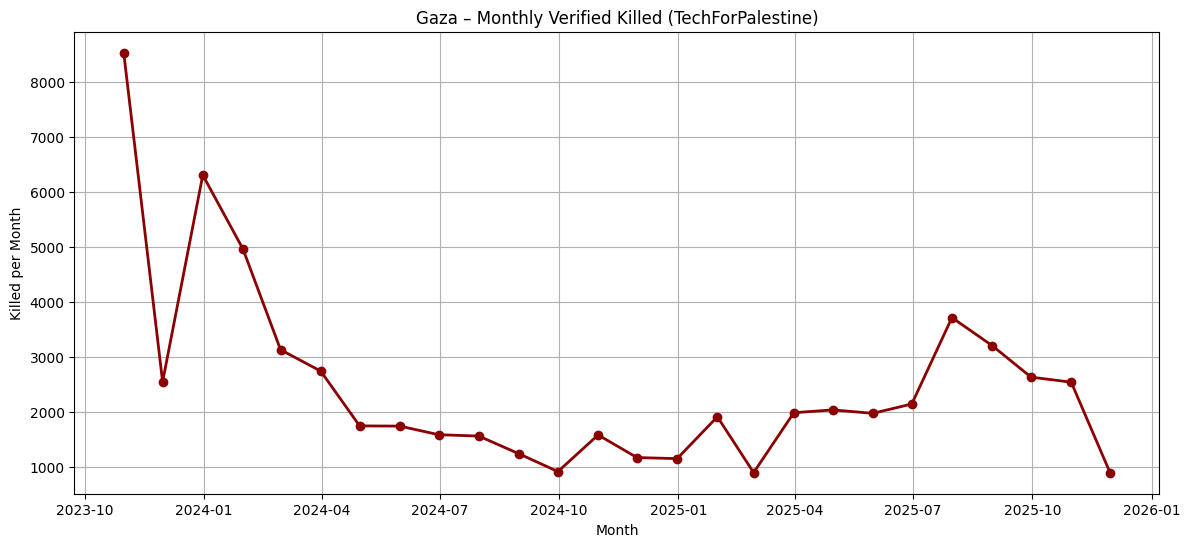

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(
    df_gaza_monthly.index,
    df_gaza_monthly["verified_killed"],
    marker="o",
    color="darkred",
    linewidth=2
)

plt.title("Gaza – Monthly Verified Killed (TechForPalestine)")
plt.xlabel("Month")
plt.ylabel("Killed per Month")
plt.grid(True)
plt.show()
